In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warnings



In [2]:

import warnings
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)

In [3]:
!pip install pdpbox

In [4]:
dt = pd.read_csv("heart.csv")


In [5]:
dt.head(10)
dt_1=dt

In [6]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [7]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'


In [8]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [9]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [10]:
dt = pd.get_dummies(dt, drop_first=True)

In [11]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) #split the data

In [13]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [15]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)


In [16]:
num_folds = 10
seed = 7
scoring =  'accuracy'

In [19]:
results=[]
names=[]
kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append("RF")
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

[]: 0.789667 (0.063891)


In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[28,  7],
       [ 3, 23]], dtype=int64)

In [21]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9032258064516129
Specificity :  0.7666666666666667


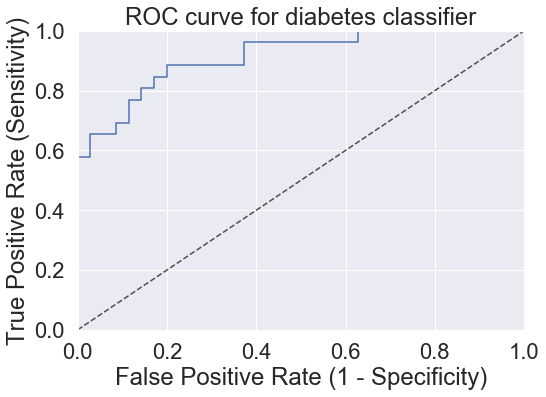

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [23]:
auc(fpr, tpr)

0.9131868131868132

In [24]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0754 ± 0.0445,thalassemia_reversable defect
0.0459 ± 0.0321,max_heart_rate_achieved
0.0393 ± 0.0334,num_major_vessels
0.0295 ± 0.0245,st_depression
0.0197 ± 0.0382,thalassemia_fixed defect
0.0197 ± 0.0245,rest_ecg_normal
0.0164 ± 0.0000,exercise_induced_angina_yes
0.0131 ± 0.0131,sex_male
0.0131 ± 0.0131,cholesterol
0.0066 ± 0.0334,age


In [25]:
df= pd.read_csv("heart.csv")
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [27]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [28]:
df.chest_pain_type = df.chest_pain_type.astype("category")
df.exercise_induced_angina = df.exercise_induced_angina.astype("category")
df.fasting_blood_sugar = df.fasting_blood_sugar.astype("category")
df.rest_ecg = df.rest_ecg.astype("category")
df.sex = df.sex.astype("category")
df.st_slope = df.st_slope.astype("category")
df.thalassemia = df.thalassemia.astype("category")

In [29]:
df = pd.get_dummies(df, drop_first=True)
#!pip install fastai
df.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')

In [30]:
#!pip install fastai
#from fastai.imports import *
#from fastai.structured import *
#from pandas_summary import DataFrameSummary
#from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
#from sklearn import metrics
#from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline 
pd.options.mode.chained_assignment = None

In [31]:
max_heart_rate_achieved = pd.cut(df.max_heart_rate_achieved,4,labels=["71-104","105-137","138-170","171-202"])

In [32]:
cross1=pd.crosstab([df.st_slope_flat[df.st_slope_flat==1],df.target],max_heart_rate_achieved).style.background_gradient(cmap='summer_r')
cross1

In [34]:
cross1=pd.crosstab([df.st_slope_flat[df.st_slope_flat==1],df["thalassemia_fixed defect"][df["thalassemia_fixed defect"]==1],
                    df.target],max_heart_rate_achieved).style.background_gradient(cmap='summer_r')
cross1

In [35]:
cross1=pd.crosstab([df["thalassemia_fixed defect"]],df.sex_male,margins=True).style.background_gradient(cmap='summer_r')
cross1

sex_male,0,1,All
thalassemia_fixed defect,,,
0,17,120,137
1,79,87,166
All,96,207,303


In [36]:
cross1=pd.crosstab([df["thalassemia_fixed defect"][df["thalassemia_fixed defect"]==1],df.target],df.sex_male).style.background_gradient(cmap='summer_r')
cross1

In [37]:
cross1=pd.crosstab([df.exercise_induced_angina_yes[df.exercise_induced_angina_yes==1],df.target],[df.st_slope_upsloping[df.st_slope_upsloping==1],df.st_depression]).style.background_gradient(cmap='summer_r')
cross1

In [38]:
age = pd.cut(df.age,6,labels=["(28.952, 37.0)", "(37.0, 45.0)", "(45.0, 53.0)","(53.0, 61.0)","(61.0, 69.0)", "(69.0, 77.0)"])

In [39]:
cross1=pd.crosstab([pd.cut(df.resting_blood_pressure,3),df.target],[age]).style.background_gradient(cmap='summer_r')
cross1

In [40]:
dt= pd.read_csv('heart.csv')

In [41]:
array = dt.values
X = array[:,0:12].astype(float)
Y = array[:,13]
validation_size = 0.20
seed = 7
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    #test_size=validation_size, random_state=seed)


In [43]:
def corr_heatmap(df):
    correlations = df.corr()
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()

def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

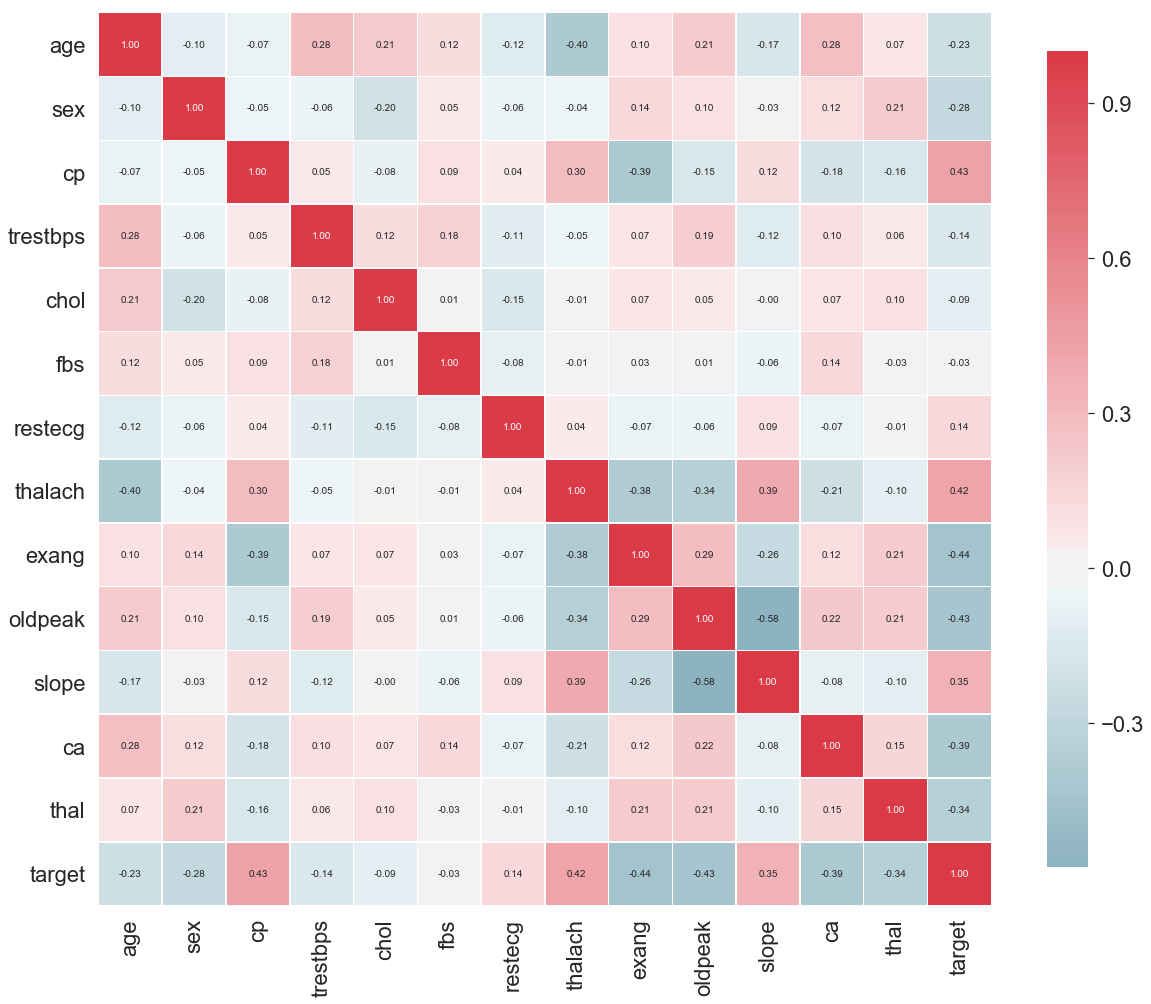

In [44]:
corr_heatmap(dt)

In [45]:
num_folds = 10
seed = 7
scoring =  'accuracy'

In [46]:
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

In [47]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.831000 (0.061388)
LDA: 0.818667 (0.060318)
KNN: 0.648833 (0.089200)
CART: 0.760500 (0.086027)
NB: 0.802000 (0.067880)
SVM: 0.578833 (0.097889)


In [48]:
# ensembles
ensembles = []
ensembles.append(( 'AB' , AdaBoostClassifier()))
ensembles.append(( 'GBM' , GradientBoostingClassifier()))
ensembles.append(( 'RF' , RandomForestClassifier()))
ensembles.append(( 'ET' , ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
  
  
  

AB: 0.810167 (0.040923)
GBM: 0.798167 (0.062523)
RF: 0.823333 (0.096870)
ET: 0.814667 (0.069940)


In [49]:
X_t, y_t = augment(X, Y, t=20)

In [50]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_t, y_t,
    test_size=validation_size, random_state=seed)
print(len(X_train),len(Y_train))

3986 3986


In [51]:
# ensembles
ensembles = []
ensembles.append(( 'AB' , AdaBoostClassifier()))
ensembles.append(( 'GBM' , GradientBoostingClassifier()))
ensembles.append(( 'RF' , RandomForestClassifier()))
ensembles.append(( 'ET' , ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.916702 (0.012868)
GBM: 0.907167 (0.014326)
RF: 0.888862 (0.009106)
ET: 0.887352 (0.010647)


In [52]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_t, y_t,
    test_size=validation_size, random_state=seed)
print(len(X_train),len(Y_train))

3986 3986


In [53]:
model=AdaBoostClassifier()
model.fit(X_train,Y_train)
y_predict = model.predict(X_validation)
y_pred_quant = model.predict_proba(X_validation)[:, 1]
y_pred_bin = model.predict(X_validation)

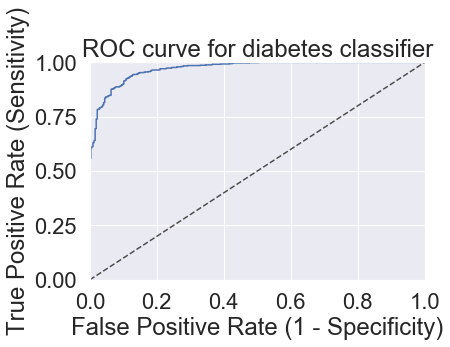

In [54]:
fpr, tpr, thresholds = roc_curve(Y_validation, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [55]:
auc(fpr, tpr)

0.9710794581762323

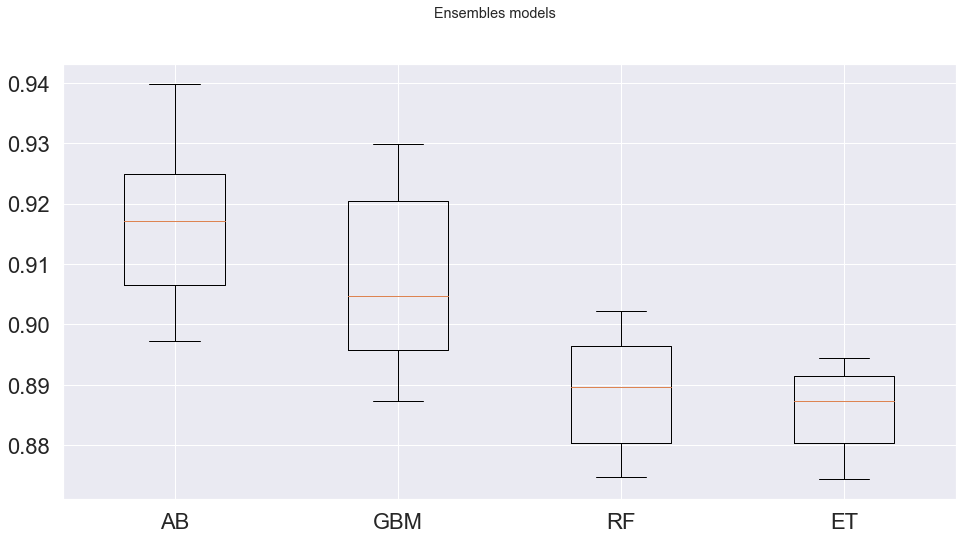

In [56]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle( 'Ensembles models' )
ax = fig.add_subplot(111 )
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#AdaBoost with augmentation is better performing than every other models